In [7]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

ROOT_DIR = '/mnt/ceph/users/alu10/datasets/256x256x256_Registered_Iso_Blastospim1-Trilinear_Image'

In [2]:
train_df = pd.read_csv('../annotations/train_split_4D.csv', keep_default_na=False)
val_df = pd.read_csv('../annotations/val_split_4D.csv', keep_default_na=False)

In [3]:
train_df

,image_before,image_target,image_after,mask_target
0,,F2/F2_008/images/F2_008_image_0001.npy,F2/F2_009/images/F2_009_image_0001.npy,F2/F2_008/masks/F2_008_masks_0001.npy
1,,F2/F2_008/images/F2_008_image_0002.npy,F2/F2_009/images/F2_009_image_0002.npy,F2/F2_008/masks/F2_008_masks_0002.npy
2,,F2/F2_008/images/F2_008_image_0003.npy,F2/F2_009/images/F2_009_image_0003.npy,F2/F2_008/masks/F2_008_masks_0003.npy
3,,F2/F2_008/images/F2_008_image_0004.npy,F2/F2_009/images/F2_009_image_0004.npy,F2/F2_008/masks/F2_008_masks_0004.npy
4,,F2/F2_008/images/F2_008_image_0005.npy,F2/F2_009/images/F2_009_image_0005.npy,F2/F2_008/masks/F2_008_masks_0005.npy
...,...,...,...,...
8420,T2/T2_015/images/T2_015_image_0004.npy,T2/T2_016/images/T2_016_image_0004.npy,,T2/T2_016/masks/T2_016_masks_0004.npy
8421,T2/T2_015/images/T2_015_image_0005.npy,T2/T2_016/images/T2_016_image_0005.npy,,T2/T2_016/masks/T2_016_masks_0005.npy
8422,T2/T2_015/images/T2_015_image_0006.npy,T2/T2_016/images/T2_016_image_0006.npy,,T2/T2_016/masks/T2_016_masks_0006.npy
8423,T2/T2_015/images/T2_015_image_0007.npy,T2/T2_016/images/T2_016_image_0007.npy,,T2/T2_016/masks/T2_016_masks_0007.npy


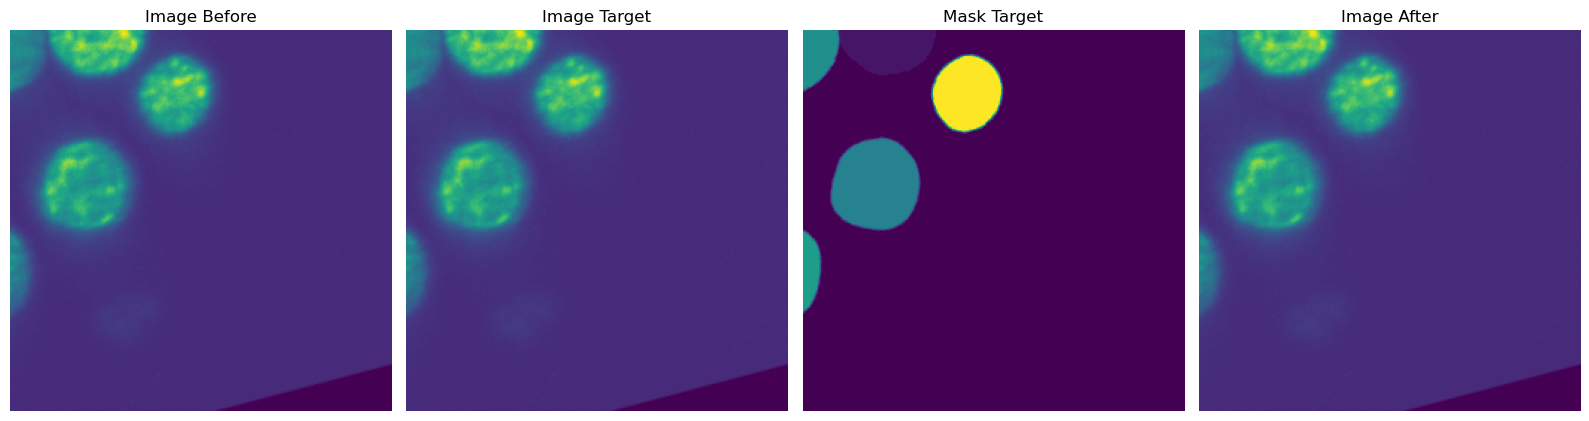

In [33]:
# Load index
idx = 4567

# Load the main image and mask
image_target = np.load(os.path.join(ROOT_DIR, train_df.iloc[idx]['image_target']))
mask_target = np.load(os.path.join(ROOT_DIR, train_df.iloc[idx]['mask_target']))

# Initialize a list for titles and images to display
images = [image_target, mask_target]
titles = ['Image Target', 'Mask Target']

# Load "before" image if available
image_before_path = train_df.iloc[idx]['image_before']
if image_before_path:
    image_before = np.load(os.path.join(ROOT_DIR, image_before_path))
    images.insert(0, image_before)
    titles.insert(0, 'Image Before')

# Load "after" image if available
image_after_path = train_df.iloc[idx]['image_after']
if image_after_path:
    image_after = np.load(os.path.join(ROOT_DIR, image_after_path))
    images.append(image_after)
    titles.append('Image After')

# Plot all images side by side
plt.figure(figsize=(4 * len(images), 5))

for i, (img, title) in enumerate(zip(images, titles)):
    plt.subplot(1, len(images), i + 1)
    plt.imshow(img.max(axis=0))
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()